# Vending Machine

#### You are designing a vending machine, and want the machine to be able to detect the difference between U.S. and Canadian quarters. The diameter of U.S. quarters averages $24.26$ mm, while Canadian quarters average $23.81$ mm. Suppose that coin diameters in circulation, whether U.S. or Canadian, are normally distributed with standard deviation $0.15$ mm (this number and distribution are both made up, but let’s go with it). Furthermore, vending machines measure diameters with error, so if the true diameter is $D$ mm, then the vending machine returns $D + E$ mm, where $E$ stands for “error,” is normally distributed with mean $0$ mm and standard deviation $0.21$ mm, and is independent of the true measurements of the coin.

#### Suppose the vending machine measures a quarter, and declares it to be a U.S. quarter if the measured diameter is greater than $24.02$ mm. Use simulation to determine the probability that the vending machine will, when given a Canadian quarter, accept it as a U.S. quarter. Ensure your answer is accurate to approximately two decimal places (i.e. halfwidth less than or equal to $0.005$) when using a $95\%$ CI. Also, compare your simulation answer to the true probability as computed using the normal distribution.

#### Perform a pilot run to determine sample std to calculate n. 

In [1]:
import numpy as np
import scipy.stats 
import scipy as sp
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

In [3]:
# Pilot to find sample std 

n = 1000

CAN_mean = 23.81;
CAN_std = .15;
ERROR_mean = 0;
ERROR_std = .21;

CAN = np.random.normal(CAN_mean, CAN_std, n)
ERROR = np.random.normal(ERROR_mean, ERROR_std, n)

read = CAN + ERROR
accept = (read > 24.02)

print ('sample std:', np.std(accept))

sample std: 0.408724846321


Choose n= 25000

In [6]:
# Simulation with n determined from pilot

n = 25000

CAN_mean = 23.81;
CAN_std = .15;
ERROR_mean = 0;
ERROR_std = .21;

CAN = np.random.normal(CAN_mean, CAN_std, n)
ERROR = np.random.normal(ERROR_mean, ERROR_std, n)

read = CAN + ERROR
accept = (read > 24.02)

accept_mean = np.mean(accept)
accept_std = np.std(accept)

halfwidth = 1.96*accept_std/sqrt(n)

lowerB = accept_mean - halfwidth
upperB = accept_mean + halfwidth

print ('Probability of accepting Canada as US: ', accept_mean)
print ('95% confidence interval: ', (lowerB, upperB))

Probability of accepting Canada as US:  0.20748
95% confidence interval:  (0.20245334241570659, 0.21250665758429341)


#### Suppose that if the vending machine rejects your quarter on the first attempt, you will try it one more time before giving up. If you use a Canadian quarter, then what is the probability it will be accepted within these two trials? Use a simulation to construct a 95% confidence interval for this probability. Again, use enough trials so that your confidence interval half width is no more than $0.005$.

In [7]:
# Pilot to find sample std 

n = 1000

CAN_mean = 23.81;
CAN_std = .15;
ERROR_mean = 0;
ERROR_std = .21;

CAN = np.random.normal(CAN_mean, CAN_std, n)

# First attempt 
ERROR1 = np.random.normal(ERROR_mean, ERROR_std, n)

read1 = CAN + ERROR1
accept1 = (read1 > 24.02)

# Second atempt - error changes, coin diameter the same
ERROR2 = np.random.normal(ERROR_mean, ERROR_std, n)

read2 = CAN + ERROR2
accept2 = (read2 > 24.02)

# Both attempts
accept = (accept1 + accept2)

print ('sample std:', np.std(accept))

sample std: 0.475041050858


Choose n = 36000

In [8]:
# Simulation with n determined from pilot

n = 36000

CAN_mean = 23.81;
CAN_std = .15;
ERROR_mean = 0;
ERROR_std = .21;

CAN = np.random.normal(CAN_mean, CAN_std, n)

# First attempt 
ERROR1 = np.random.normal(ERROR_mean, ERROR_std, n)

read1 = CAN + ERROR1
accept1 = (read1 > 24.02)

# Second atempt - error changes, coin diameter the same
ERROR2 = np.random.normal(ERROR_mean, ERROR_std, n)

read2 = CAN + ERROR2
accept2 = (read2 > 24.02)

# Both attempts
accept = (accept1 + accept2)

accept_mean = np.mean(accept)
accept_std = np.std(accept)

halfwidth = 1.96*accept_std/sqrt(n)

lowerB = accept_mean - halfwidth
upperB = accept_mean + halfwidth

print ('Probability of accepting Canada as US twice: ', accept_mean)
print ('95% confidence interval: ', (lowerB, upperB))

Probability of accepting Canada as US twice:  0.347111111111
95% confidence interval:  (0.34219344863406631, 0.35202877358815587)


#### In practice, vending machines also measure thickness. The mean thickness of U.S. quarters is 1.75mm while that of Canadian quarters is 1.58mm. Suppose that the standard deviation of a quarter's thickness is 0.1mm for both types of quarters and thicknesses are again normally distributed. Because the minting process utilizes coin blanks containing a certain amount of material, we will assume that the thickness and diameter of coins are negatively correlated. Assume that the correlation is $\rho = -0.5$ for both U.S. and Canadian quarters. Assume that the vending machine measures thickness with errors that are normally distributed with mean 0 and standard deviation 0.05mm. Now suppose that the vending machine accepts coins as being U.S. coins if the measured diameter is more than 24.02mm $\textbf{and}$ the measured thickness is more than 1.68mm. Assume the same situation as in the previous part where if your coin is rejected upon first insertion, you will try one more time then give up. Estimate the probability that a Canadian quarter will be accepted by the vending machine as a U.S. quarter within 2 tries.

In [9]:
n = 36000

CAN_mean = [23.81, 1.58]

CAN_std_d = .15;
CAN_std_t = .1;

ERROR_mean_d = 0;
ERROR_std_d = .21;

ERROR_mean_t = 0;
ERROR_std_t = .05;

# Generating Canadian coin of correlated diameter and thickness
rho = -.5
cov = [[CAN_std_d**2, rho*(CAN_std_d*CAN_std_t)],
      [rho*(CAN_std_d*CAN_std_t), CAN_std_t**2]]

d, t = np.random.multivariate_normal(CAN_mean, cov, n).T                                

# First attempt 
ERROR1_d = np.random.normal(ERROR_mean_d, ERROR_std_d, n)
ERROR1_t = np.random.normal(ERROR_mean_t, ERROR_std_t, n)

read1_d = d + ERROR1_d
read1_t = t + ERROR1_t
accept1 = np.all([read1_d > 24.02, (read1_t > 1.68)], axis=0)

# Second atempt - error changes, coin the same
ERROR2_d = np.random.normal(ERROR_mean_d, ERROR_std_d, n)
ERROR2_t = np.random.normal(ERROR_mean_t, ERROR_std_t, n)

read2_d = d + ERROR2_d
read2_t = t + ERROR2_t
accept2 = np.all([read2_d > 24.02, (read2_t > 1.68)], axis=0)

# Both attempts
accept = (accept1 + accept2)

print ('Probability of accepting Canada as US twice: ', np.mean(accept))

Probability of accepting Canada as US twice:  0.03825


# Acceptance-Rejection Algorithm

#### Let the random variable $X$ have density

#### $$ f(x) = \left\{ \begin{array}{l l} (5 x^4 + 4x^3 + 1)/3  & \text{ for } 0 \leq x \leq 1 \\ 0 & \text{ otherwise. } \end{array} \right. $$

#### Give an acceptance-rejection algorithm to generate samples of X.

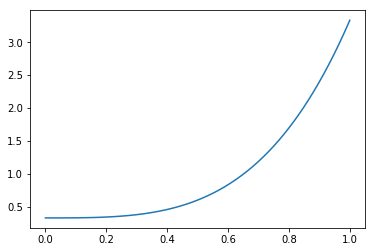

In [10]:
x = np.linspace(0,1,100)
fx = (5*x**4 + 4*x**3 +1)/3
plt.plot(x,fx)

1. Generate V ~ Unif(0,1), U ~ Unif(0,1)
2. If U $\le \frac{f(V)}{M}$ accept V and set X <- V,
otherwise reject V, and go back to Step 1.

f(x) is an increasing function from $0\le x\le 1 $ so max of f(x) occurs when x=1, f(1) = $\frac{5+4+1}{3}= \frac{10}{3}$ so in this case M = $\frac{10}{3}$.

#### On average, how many samples from the uniform distribution over [0,1] would your acceptance-rejection algorithm need in order to genereate one sample of X?

Area under f(x) from $0\le x \le 1$ is 1 since the area under pdf is always 1 so the acceptance region is $\frac{1}{M}$ Therefore on average we would need M samples to generate on sample of X. M = $\frac{10}{3}$.

#### Use your algorithm to generate 2,500 samples of X. Note that this will require more than 2500 uniform random variables. Plot a histogram of your sample and compare it against the true pdf. 

In [13]:
# code based off Reciatation 4 Code
n = 2500
X= np.empty(n)
M = 10/3

count=0
i = 0
while i < n:
    count += 1
    V = np.random.rand()
    U = np.random.rand()
    if U <= ((5*V**4 + 4*V**3 +1)/3)/M:
        X[i] = V
        i +=1

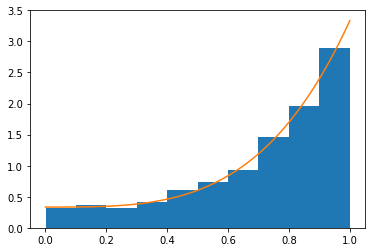

In [14]:
plt.hist(X, normed = True);

x = np.linspace (0,1,100)
fx = (5*x**4 + 4*x**3 +1)/3
plt.plot(x,fx)

# Maximize Profit Contract

#### Fingerlatkes MDF Co. produces sheets of medium-density fiberboard. Produceing each ton of MDF requires 1 ton of wood chips, which can be acquired through contract purchases from several suppliers. 

#### Fingerlakes won't be sure what its total demand will be before December, but have to decide which contractors to contract with in October. By contracting with supplier, commiting to pay for at least 80% of suppliers capcacity and can order up to 100% of supplier's capacity. Decision to contract with suppliar is binary.

#### If turns out need more chips than contracted suppliers can supply, can obtain rest of chips on spot market paying the spot price which has triangular distirbution with min \$16, \$30 and most likely \$20 (per metric ton. 

#### Fingerlakes has confirmed contracts fro 4,000 tons of MDF and are negotiation 10 small contracts each for 200 tons of MDF, and 2 large contracts for 2,500 tons of MDF. They believe their chances of getting the small contracts is 50% and 40% for the large contracts. Fingerlakes will always produce enought to meet the contracted demand. 

#### Suppose Fingerlakes signed contracts with all four suppliers. Provide estimates for the 10th percentile, median, and 90th percentile of the total cost of sourcing the wood chips needed to satisfy MDF demand. Also provide an estimate and a confidence interval (with confidence interval of your choice) for the expected total cost of sourcing the wood chips

In [16]:
n=10000
lowest_cost = (10*(2000*0.8)+11.2*(3000*0.8)+\
               12.3*(2000*0.8)+15*(3000*0.8))
lowest_order = (2000+3000+2000+3000)*0.8
overall_cost = np.empty(n)
spot_price = np.random.triangular(16,20,30)

for i in range(n):
    small = np.random.binomial(10,0.5) #small contracts
    large = np.random.binomial(2,0.4) #large contracts
    demand = 4000 + small*200 + large *2500
    shortage = max(0, demand - lowest_order)
    add_cost = 0
    if (shortage>0):
        add_cost += min(2000*0.2,shortage)*10+\
        min(max(shortage-2000*0.2,0), 3000*0.2)*11.2+\
        min(max(shortage-2000*0.2-3000*0.2,0),2000*0.2)*12.3+\
        min(max(shortage-2000*0.4-3000*0.2,0),3000*0.2)*15+\
        max(shortage-2000*0.4-3000*0.4,0)*spot_price
    overall_cost[i] = lowest_cost + add_cost

print ('10 percentile estimate of total cost: '+\
str(np.percentile(overall_cost,10)))
print ('median estimate of total cost: '+\
str(np.percentile(overall_cost,50)))
print ('90 percentile estimate of total cost: '+\
str(np.percentile(overall_cost,90)))

all_mean = np.mean(overall_cost)
var = np.var(overall_cost, ddof=1)

halfwidth = sp.stats.norm.ppf(0.975)*sqrt(var/n)
LB = all_mean-halfwidth
UB = all_mean+halfwidth

print ("")
print ('Estimate: ' + str(all_mean))
print ('95% Confidence Interval : ', (LB,UB))

10 percentile estimate of total cost: 98560.0
median estimate of total cost: 98560.0
90 percentile estimate of total cost: 120200.0

Estimate: 102567.114623
95% Confidence Interval :  (102381.18337118038, 102753.04587407262)


#### Which subset of suppliers should Fingerlakes contract with so as to minimize the expected chip supply cost, and what is the resulting expected chip supply cost?

Since we need to satisfy at least 4,000 tons, we need to have at least 2 suppliers. 


{1,2} is always preferable over {1,4},{2,3},{3,4}. <br>
Subset of size 2 to check: {1,2}, {1,3}, {2,4}.


{1,2,3} is always preferable over {1,3,4}, <br>
{1,2,4} is always preferable over {2,3,4}. <br>
Subset of size 3 to check: {1,2,3}, {1,2,4}

We have already checked {1,2,3,4} in 3a).

In [17]:
check = [[1,2],[1,3],[2,4],[1,2,3],[1,2,4]]
Price = [10, 11.2, 12.3, 15]
Capacity = [2000, 3000, 2000, 3000]


n=10000

cheapest_subset = 0
cheapest_cost = all_mean #start by saying cheapest is {1,2,3,4}

overall_cost = np.empty(n)

for x in check:
    if (len(x) == 2):
        lowest_cost = Price[x[0]-1]*(Capacity[x[0]-1]*0.8)+\
                       Price[x[1]-1]*(Capacity[x[1]-1]*0.8)
        
        for i in range(n):
            small = np.random.binomial(10,0.5) #small contracts
            large = np.random.binomial(2,0.4) #large contracts
            demand = 4000 + small*200 + large *2500
            lowest_order = (Capacity[x[0]-1] + Capacity[x[1]-1])*0.8
            shortage = max(0, demand - lowest_order)
            spot_price = np.random.triangular(16,20,30)
            add_cost = 0
            if (shortage>0):
                add_cost += min(Capacity[x[0]-1]*0.2,shortage)*Price[x[0]-1]+\
                min(max(shortage-Capacity[x[0]-1]*0.2,0), Capacity[x[1]-1]*0.2)*Price[x[1]-1]+\
                max(shortage-Capacity[x[0]-1]*0.2-Capacity[x[1]-1]*0.2,0)*spot_price
        
            overall_cost[i] = lowest_cost + add_cost
    
    if (len(x) == 3):
        lowest_cost = Price[x[0]-1]*(Capacity[x[0]-1]*0.8)+\
                       Price[x[1]-1]*(Capacity[x[1]-1]*0.8)+\
                        Price[x[2]-1]*(Capacity[x[2]-1]*0.8)
        
        for i in range(n):
            small = np.random.binomial(10,0.5) #small contracts
            large = np.random.binomial(2,0.4) #large contracts
            demand = 4000 + small*200 + large *2500
            lowest_order = (Capacity[x[0]-1] + Capacity[x[1]-1]+Capacity[x[2]-1])*0.8
            shortage = max(0, demand - lowest_order)
            spot_price = np.random.triangular(16,20,30)
            add_cost = 0
            if (shortage>0):
                add_cost += min(Capacity[x[0]-1]*0.2,shortage)*Price[x[0]-1]+\
                min(max(shortage-Capacity[x[0]-1]*0.2,0), Capacity[x[1]-1]*0.2)*Price[x[1]-1]+\
                min(max(shortage-Capacity[x[0]-1]*0.2-Capacity[x[1]-1]*0.2,0), Capacity[x[2]-1]*0.2)*Price[x[2]-1]+\
                max(shortage-Capacity[x[0]-1]*0.2-Capacity[x[1]-1]*0.2-Capacity[x[2]-1]*0.2,0)*spot_price
        
            overall_cost[i] = lowest_cost + add_cost

    mean = np.mean(overall_cost)
    
    if mean < cheapest_cost:
        cheapest_cost = mean
        cheapest_subset = x

#print cheapest_cost
        
print ('Fingerlakes should contact the subset of suppliers '+\
str(cheapest_subset) + ' to minimize the expected chip supply cost'+\
' with the resulting expected chip supply cost $' +\
str(round(cheapest_cost,2)) + '.')

Fingerlakes should contact the subset of suppliers [1, 2, 3] to minimize the expected chip supply cost with the resulting expected chip supply cost $88783.45.
